## Sales Prediction Using Python

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset
df=pd.read_csv('/Users/BBK/Files/Job Hunt/Oasis Infobyte/Datasets/Sales Prediction Using Python.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Wrangling

In [4]:
#drop the unmammed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

Check for outliers
    * There only a few outliers in the newspaper column

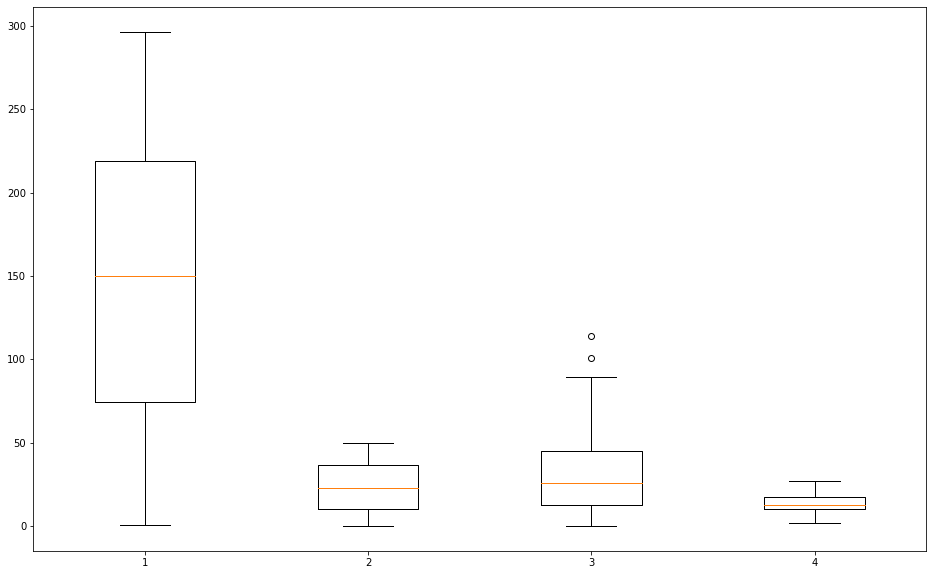

In [8]:
plt.figure(figsize=(16,10))
plt.boxplot(df)
plt.show()

In [9]:
def find_outlier(df, col):
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr= q3-q1
    min_r=q1-1.5*iqr
    max_r=q3+1.5*iqr
    outliers_indices=df.index[(df[col] > max_r) | (df[col] < min_r)]
    return outliers_indices

In [10]:
find_outlier(df,'Newspaper')

Int64Index([16, 101], dtype='int64')

In [11]:
#drop the rows with outliers
df.drop([16,101], axis=0, inplace=True)

In [12]:
#find correlation coefficient
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


We don't see any significant correlation between any of the predictor variables. Thus there is no need to drop any

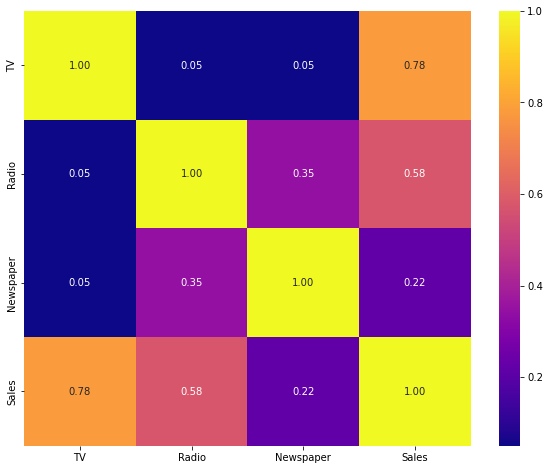

In [13]:
#plot a heatmap for better visibility
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot =True, fmt='0.2f', cmap='plasma')
plt.show()

Predicted variable and 'TV' has a strong correlation. Which is good for the algorithm

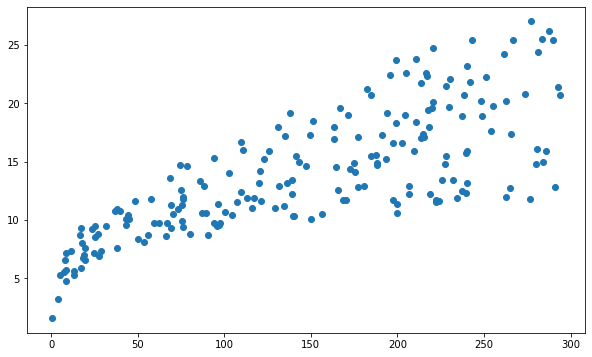

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['TV'], y=df['Sales']) 
plt.show()

#### We check for normality of the target variable
    *In Regression analysis we assume that the predicted variable is normally distributed.

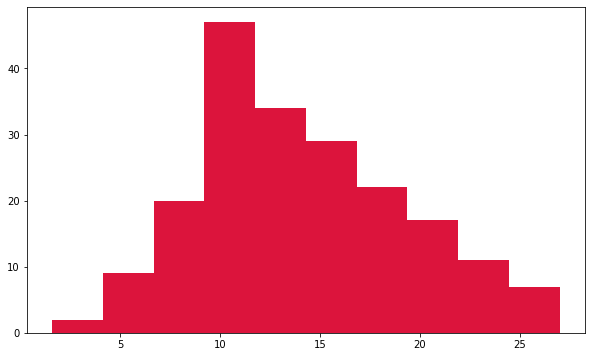

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['Sales'], color='crimson')
plt.show()

Although, there is a hint of right skewness, it is realtively normally distributed.

## Data Pre Processing

In [16]:
#Create two datasets of features and labels
X=df.drop('Sales', axis=1)
Y=df['Sales']

In [17]:
#we have to scale the data for better prediction results
from sklearn.preprocessing import StandardScaler

In [18]:
scale=StandardScaler()

In [19]:
#scale data
X_scaled=scale.fit_transform(X)

In [20]:
#transform scaled data array back into a data frame
X=pd.DataFrame(data=X_scaled, columns=X.columns)

#### Cross validation

In [21]:
#import train test split
from sklearn.model_selection import train_test_split

In [22]:
#split data
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=.2, random_state=7)

## Model Creation
    *We have a lot of models to choose from in regression but we will go for Random Forest Regressor

In [23]:
#import model
from sklearn.ensemble import RandomForestRegressor

In [24]:
model_rfr=RandomForestRegressor()

In [25]:
#train the model
model_rfr.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
#predict values from test dataset
y_pred=model_rfr.predict(x_test)

## Model Evaluation

In [27]:
#import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
#MAE
mean_absolute_error(y_test,y_pred)

0.5683749999999976

In [29]:
#MSE
mean_squared_error(y_test,y_pred)

0.5529629249999972

In [30]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.7436147692185768